<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Mean_Reversion_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install yfinance

In [62]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime

In [63]:
end_date=datetime.today().strftime('%Y-%m-%d')
df=yf.download('SLV',start='2016-05-13',end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-13,16.160000,16.290001,16.080000,16.280001,16.280001,6156500
2016-05-16,16.480000,16.549999,16.270000,16.320000,16.320000,6588700
2016-05-17,16.309999,16.500000,16.290001,16.410000,16.410000,5992300
2016-05-18,16.160000,16.320000,15.900000,16.000000,16.000000,13533300
2016-05-19,15.570000,15.720000,15.530000,15.670000,15.670000,17547100
...,...,...,...,...,...,...
2024-08-12,25.379999,25.600000,25.120001,25.490000,25.490000,15323100
2024-08-13,25.209999,25.440001,25.110001,25.420000,25.420000,11860500
2024-08-14,25.260000,25.410000,24.799999,25.129999,25.129999,14114400


In [64]:
def SMA(data,period=30,column='Adj Close'):
  return data[column].rolling(window=period).mean()

In [65]:
df['SMA']=SMA(df)
df['Simple_Returns']=df.pct_change(1)['Adj Close']
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Adj Close']/df['SMA']
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2016-05-13,16.160000,16.290001,16.080000,16.280001,16.280001,6156500,NaN,NaN,NaN,NaN
2016-05-16,16.480000,16.549999,16.270000,16.320000,16.320000,6588700,NaN,0.002457,0.002454,NaN
2016-05-17,16.309999,16.500000,16.290001,16.410000,16.410000,5992300,NaN,0.005515,0.005500,NaN
2016-05-18,16.160000,16.320000,15.900000,16.000000,16.000000,13533300,NaN,-0.024985,-0.025302,NaN
2016-05-19,15.570000,15.720000,15.530000,15.670000,15.670000,17547100,NaN,-0.020625,-0.020841,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-12,25.379999,25.600000,25.120001,25.490000,25.490000,15323100,26.641333,0.019600,0.019410,0.956784
2024-08-13,25.209999,25.440001,25.110001,25.420000,25.420000,11860500,26.593667,-0.002746,-0.002750,0.955867
2024-08-14,25.260000,25.410000,24.799999,25.129999,25.129999,14114400,26.532333,-0.011408,-0.011474,0.947146


In [66]:
df['Ratios'].describe()

,Ratios
count,2050.000000
mean,1.003928
std,0.052893
min,0.709030
25%,0.973633
50%,0.999199
75%,1.031726
max,1.367220


In [67]:
percentiles=[15,20,50,80,85]
ratios=df['Ratios'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.95781829, 0.96605431, 0.99919855, 1.03918973, 1.04849508])

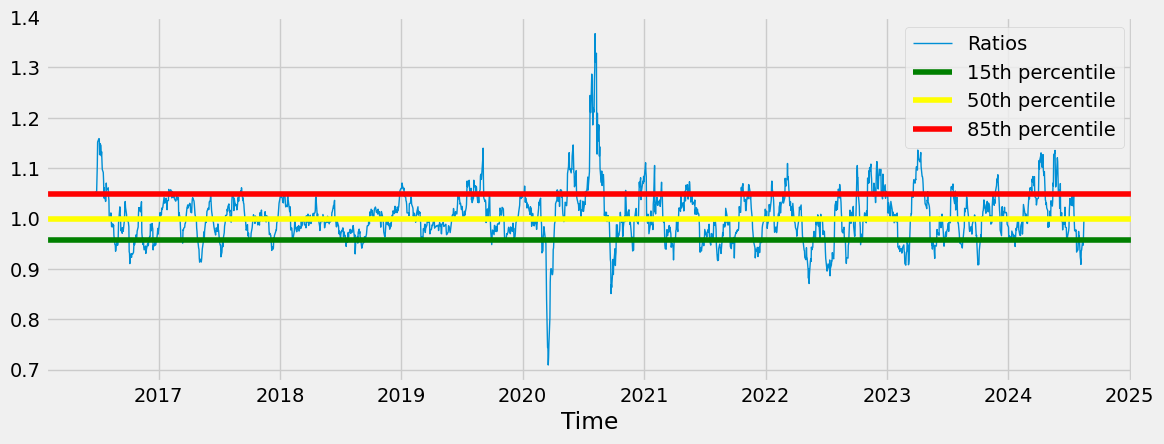

In [68]:
plt.figure(figsize=(12.5,4.5))
plt.plot(ratios,label='Ratios',linewidth=1)
plt.axhline(percentile_values[0],c='green',label="15th percentile")
plt.axhline(percentile_values[2],c='yellow',label="50th percentile")
plt.axhline(percentile_values[-1],c='red',label="85th percentile")
plt.legend()
plt.xlabel('Time')
plt.show()

In [69]:
sell=percentile_values[-1]#We want to sell when it hits the 85th percentile
buy=percentile_values[0]#We want ot buy when it hits the 15the percentile
df['Position']=np.where(df.Ratios>sell,-1,np.nan)
df['Position']=np.where(df.Ratios<buy,1,df['Position'])

df['Postion']=df['Position'].ffill()

df["Buy"]=np.where(df.Position==1,df["Adj Close"],np.nan)
df["Sell"]=np.where(df.Position==-1,df["Adj Close"],np.nan)

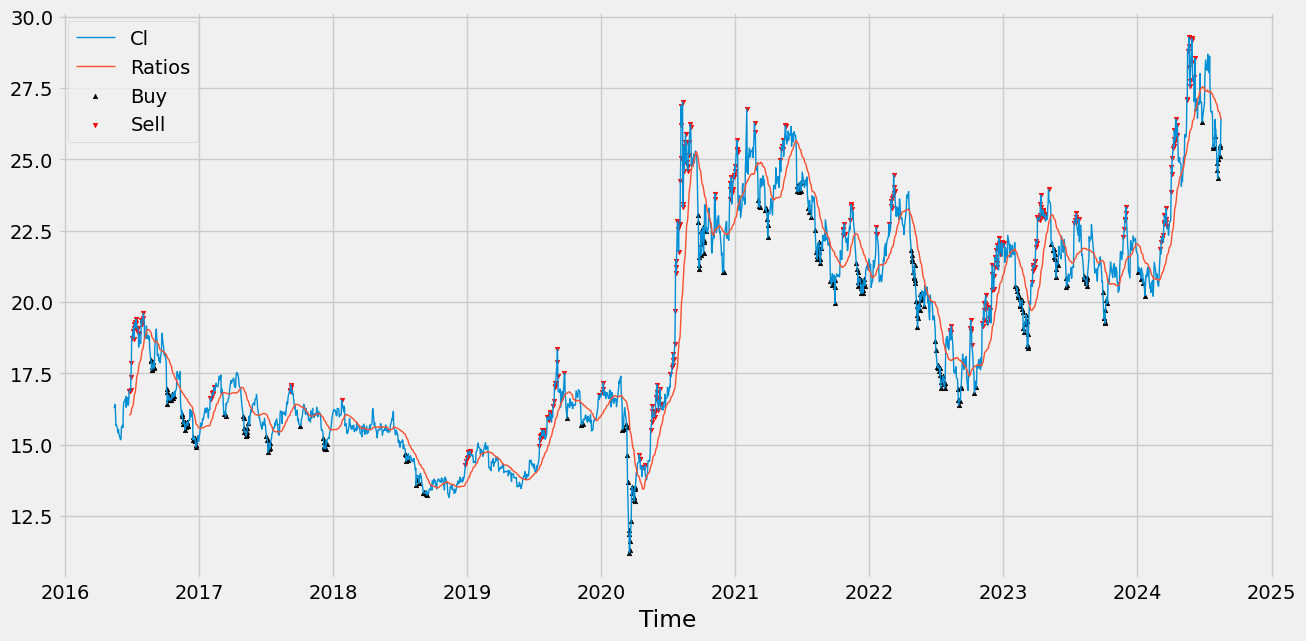

In [70]:
plt.figure(figsize=(14,7))
plt.plot(df["Adj Close"],label='Cl',linewidth=1)
plt.plot(df["SMA"],label='Ratios',linewidth=1)
plt.scatter(df.index,df["Buy"],marker="^",color="Black",s=10,label='Buy')
plt.scatter(df.index,df["Sell"],marker="v",color="red",s=10,label='Sell')
plt.legend()
plt.xlabel('Time')
plt.show()

In [91]:
df["Strategy_Returns"]=df.Position.shift(1) * df.Log_Returns
df["Strategy_Returns"]

,Strategy_Returns
Date,
2016-05-13,NaN
2016-05-16,NaN
2016-05-17,NaN
2016-05-18,NaN
2016-05-19,NaN
...,...
2024-08-12,0.019410
2024-08-13,-0.002750
2024-08-14,-0.011474


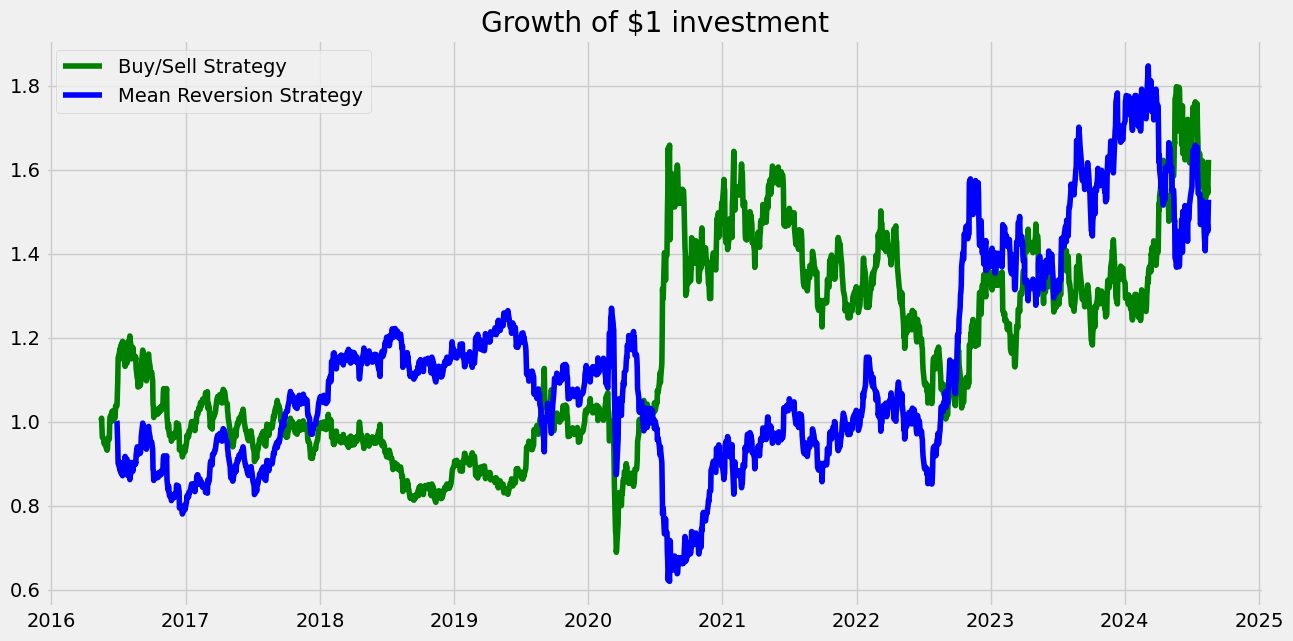

In [92]:
plt.figure(figsize=(14,7))
plt.title("Growth of $1 investment")
plt.plot(np.exp(df["Log_Returns"].dropna()).cumprod(),c='green',label="Buy/Sell Strategy")
plt.plot(np.exp(df["Strategy_Returns"].dropna()).cumprod(),c='blue',label="Mean Reversion Strategy")
plt.legend()
plt.show()